## 키워드 분석(keyword analysis)
+ 키워드 : 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
+ 불용어 제거, 어간추출, 형태소 분석 등의 자연어 처리를 시행한 후, 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 키워드 추출
+ 텍스트의 주제 추정, 텍스트 유사도, 검색엔진의 검색결과 우선순위 측정 등에 응용

In [30]:
#한글 폰트 설정
#참고 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221225208497
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_path = 'C:\Windows\Fonts\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  import sys


### 네이버 영화 리뷰 데이터

In [9]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
len(raw), raw[:2]
#모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재(raw[0])
#=> 데이터를 문자열로 변환하고 리뷰만 추출

(200001,
 [b'id\tdocument\tlabel\n',
  b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n'])

In [12]:
decoded_raw = [x.decode() for x in raw[1:]]

reviews = [i.split('\t')[1] for i in decoded_raw]

reviews[:2]    

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.']

In [14]:
#MeCab으로 명사만 추출해보기
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

nouns = []
for review in reviews:
    for noun in mecab.nouns(review):
        nouns.append(noun)
        
nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

#### 불용어 사전 만들기
+ 형태소분석을 통해 조사, 접속사 등 제거 가능
+ 하지만 한국어는 명사에서도 불필요한 단어들이 많이 포함됨 ex)뭐, 끝, 이거, 번, 듯, 게 ...
+ 빈도가 너무 높아 분석에 방해되는 단어도 제거 필요 ex)영화

In [16]:
stop_words = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것'.split(' ')
 
nouns = []
for review in reviews:
    for noun in mecab.nouns(review):
        if noun not in stop_words:
            nouns.append(noun)
        
nouns[:10]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']

### 단어 빈도수 측정
+ collections 라이브러리의 Counter 함수 사용 => 각 단어의 빈도수를 tuple로 반환 => dict()에 넣어 DataFrame으로 시각화 가능

In [18]:
from collections import Counter

noun_counter = Counter(nouns)

noun_counter.most_common(10)

[('연기', 9175),
 ('최고', 8813),
 ('평점', 8514),
 ('스토리', 7163),
 ('생각', 6943),
 ('드라마', 6896),
 ('사람', 6742),
 ('감동', 6489),
 ('배우', 5893),
 ('내용', 5731)]

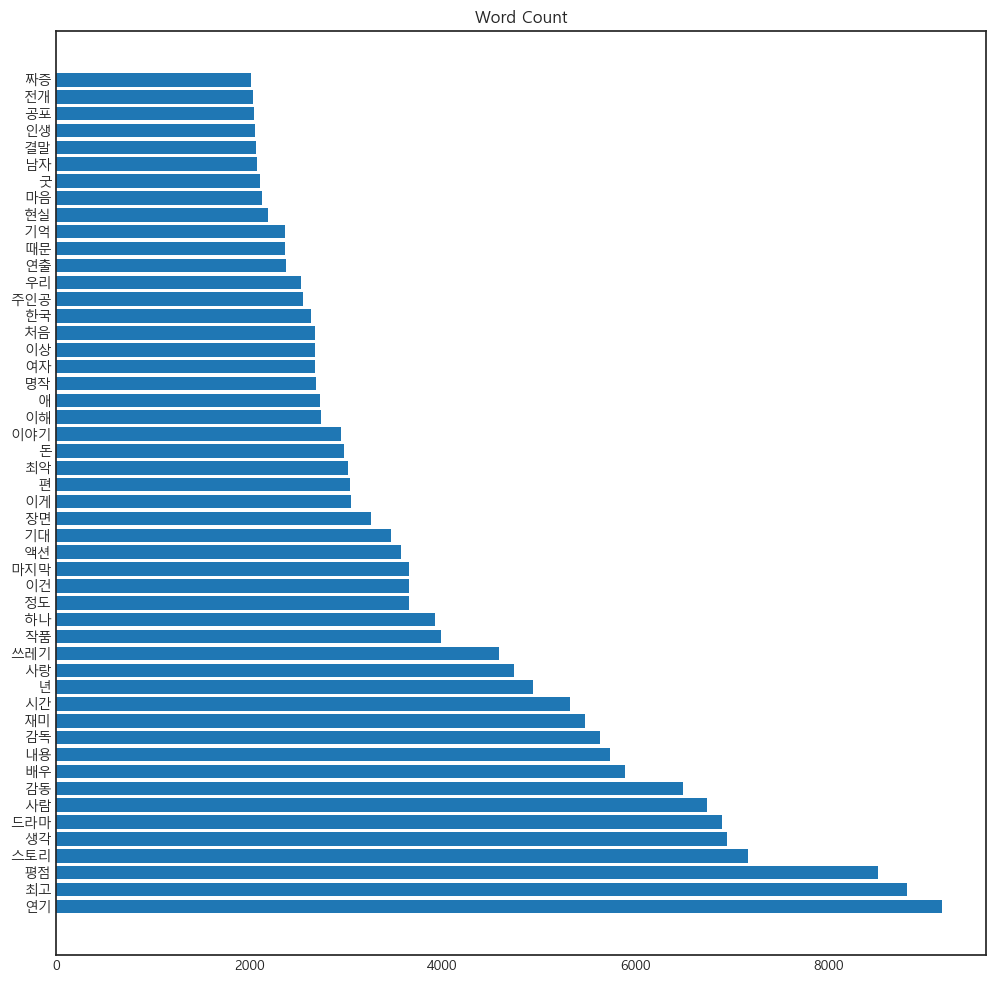

In [27]:
import numpy as np

y_pos = np.arange(50)   #0~49의 array

plt.figure(figsize=(12,12))
plt.title('Word Count')
plt.barh(y_pos, dict(noun_counter.most_common(50)).values())
plt.yticks(y_pos, dict(noun_counter.most_common(50)).keys());

### Word Cloud
+ 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화
+ 등장 빈도에 따라 크기가 다른 구름 형태로 표현
+ 빈도만 시각화하기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데에는 한계가 있음

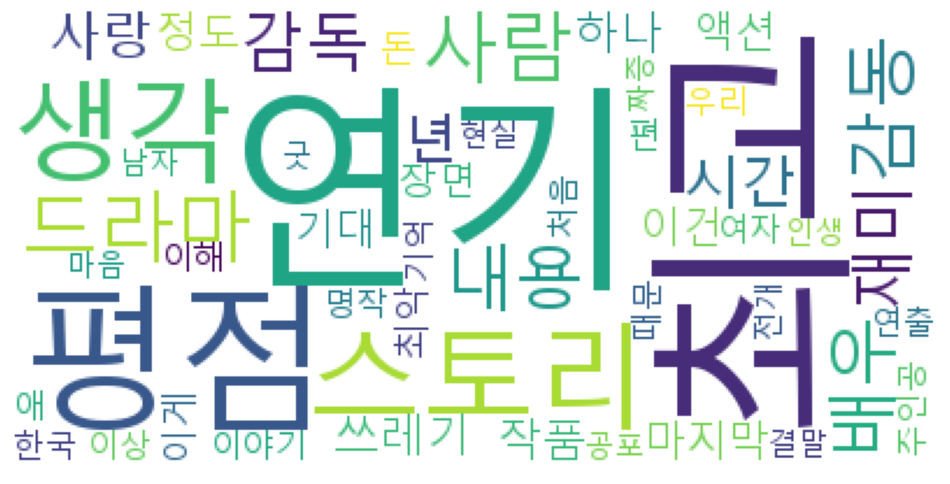

In [32]:
#!pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path=font_path)
wc.generate_from_frequencies(dict(noun_counter.most_common(50)))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc);

### 트리맵 시각화
+ squarify 라이브러리 사용 => 키워드와 빈도수를 트리맵으로 시각화
+ 빈도수가 높을수록 색상을 진하게, 면적이 넓게 시각화

<AxesSubplot:>

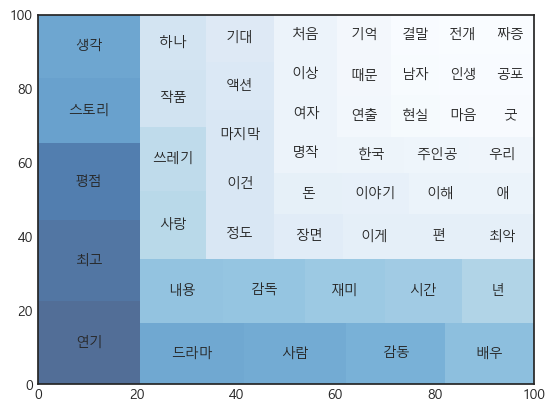

In [38]:
#!pip install squarify
import squarify

norm = matplotlib.colors.Normalize(vmin=min(dict(noun_counter.most_common(50)).values()),    #2011
                                   vmax=max(dict(noun_counter.most_common(50)).values()))    #9175
colors = [matplotlib.cm.Blues(norm(value)) for value in dict(noun_counter.most_common(50)).values()]

squarify.plot(label=dict(noun_counter.most_common(50)).keys(),
              sizes=dict(noun_counter.most_common(50)).values(),
              color=colors,
              alpha=0.7)   #투명도